In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys, re
from glob import glob

# core nltk
import nltk
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
stopWords = [",","the","and","of","or","to","in","shall","be","that","any","by",".",
              "such","as","this","for","same","all","said","other","'s",";",
              "her","is","every","[","]","they","within", "our", "not", "so",
              "made", "no", "then", ":", "do", "from", "if", "it", "which", "at", "with",
             "thereof","upon", "a", "because", "used", "some", "but", "aforesaid", "also",
             ")","(", "what", "&", "may", "are", "their", "them", "sayde", "suche", "shalbe", "anye", "sayd",
             "thesaid", "/", "...", "/", "either", "haue", "vnto", "thy", "did", "was", "were", "have", "thee", 
             "your", "thou", "unto", "hath", "had", "went"]

In [3]:
vectorizer = CountVectorizer(
    input='content',
    lowercase=True,
    ngram_range=(1,3),
    strip_accents=None,
    stop_words=stopWords)

In [4]:
# extra bi and trigrams that contain our terms
# return top twenty
def extract_top_ngrams(key_terms,model):
    vocab_sums = model.sum(axis=0)
    ktd = dict()
    for k in key_terms:
        ktd[k] = list()
    for i, idx in vectorizer.vocabulary_.items():
        for k in key_terms:
            if re.search("\\b{0}\\b".format(k),i) != None:
                    ktd[k].append([i,vocab_sums[0, idx]])
    
    for k in ktd.keys():
        ktd[k] = sorted(ktd[k], key = lambda x: x[1], reverse=True)[:20]
    return(ktd)

In [5]:
def plot_top_ngrams(ktd,model_name):
    
    for d in ktd.keys():
        plt.rcdefaults()
        ig, ax = plt.subplots()
        y = np.arange(len(ktd[d]))
        labels = [x[0] for x in ktd[d]]
        ax.barh(y,[x[1] for x in ktd[d]])
        ax.set_yticks(y)
        ax.set_yticklabels(labels)
        ax.invert_yaxis()
        title = d + ": " + model_name.replace("eebo-","")
        plt.title(title)
        plt.show()

In [6]:
def preprocess(raw_text):
    # tokenize
    tokens = word_tokenize(raw_text)    

    # drop to lowercase
    tokens = [word.lower() for word in tokens]
        
    # *step two* (default): remove non-alpha characters,
    # punctuation, and as many other "noise" elements as
    # possible. If dealing with a single character word,    
    # drop non-alphabetical characters. This will remove 
    # most punctuation but preserve many words containing
    # marks such as the '-' in 'self-emancipated'

    tmp_text=list()

    for word in tokens:
        if len(word) == 1:
            if word.isalpha == True:
                tmp_text.append(word)
        else:
             tmp_text.append(word)           
    tokens = tmp_text

    # now remove leading and trailing quotation marks,      
    # hyphens and  dashes
    tmp_text=list()
    drop_list = ['“','"','”','-','—']
    for i, word in enumerate(tokens):
        if word[0] in drop_list:
            word = word[1:]
        if word[-1:] in drop_list:
            word = word[:-1]
        
        word = word.replace("gyftis", "gifts")
        word = word.replace("gether", "gather")
        word = word.replace("spirituall", "spiritual")
        word = word.replace("feythfull", "faith")
        word = word.replace("wytnes", "witness")
        word = word.replace("almes", "alms")
        word = word.replace("desyre", "desire")
        word = word.replace("selfe", "self")
        word = word.replace("saffely", "safely")
        word = word.replace("realme", "realm")
        word = word.replace("acte", "act")
        word = word.replace("fourme", "form")
        word = word.replace("subiectes", "subjects")
        word = word.replace("theyr", "their")
        word = word.replace("kynde", "kind")
        word = word.replace("kynge", "king")
        word = word.replace("kyndes", "kinds")
        word = word.replace("vpon", "unto")
        word = word.replace("purueyours", "purveyors")
        word = word.replace("highnes", "highness")
        word = word.replace("euery", "every")
        word = word.replace("quene", "queen")
        word = word.replace("quenes", "queens")
        word = word.replace("whiche", "which")
        word = word.replace("bloude", "blood")
        word = word.replace("soueraine", "sovereign")
        
    return(tmp_text)

starting: eebo-1520-1529
loading gzipped texts...
vectorizing...
extracting top terms...


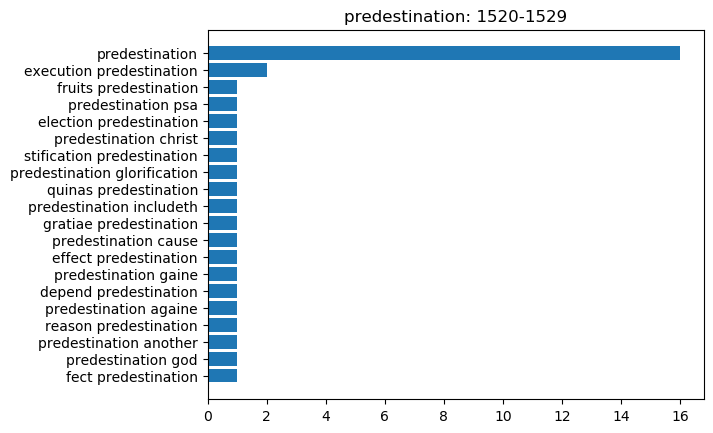

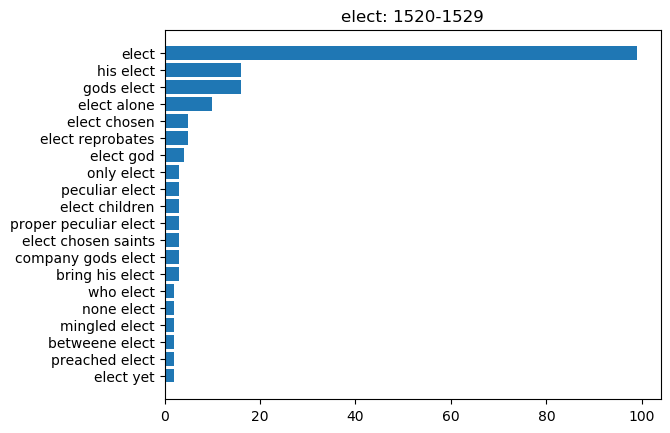

starting: eebo-1530-1539
loading gzipped texts...
vectorizing...
extracting top terms...


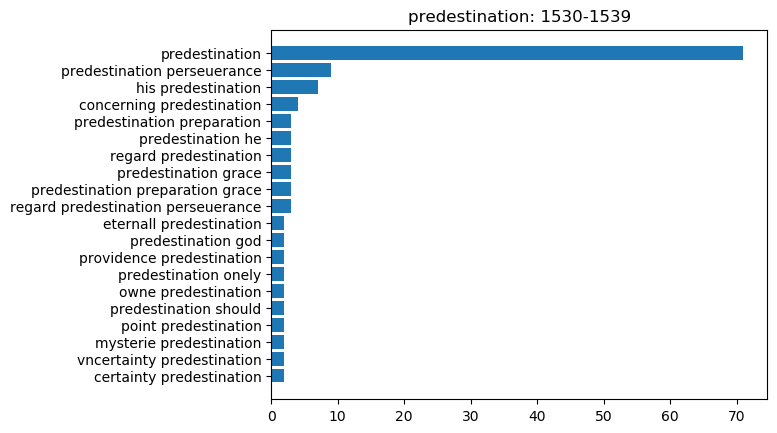

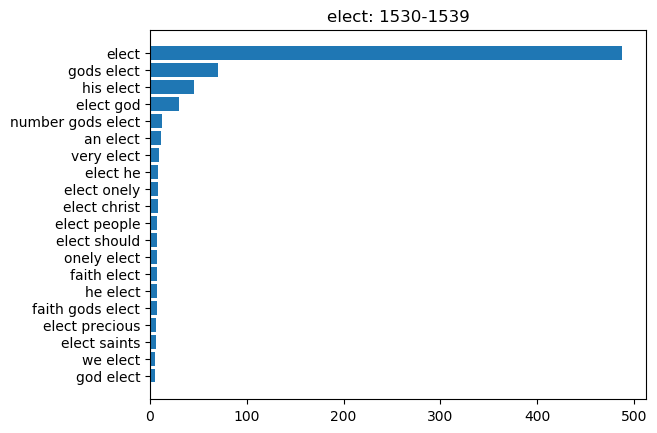

starting: eebo-1540-1549
loading gzipped texts...
vectorizing...
extracting top terms...


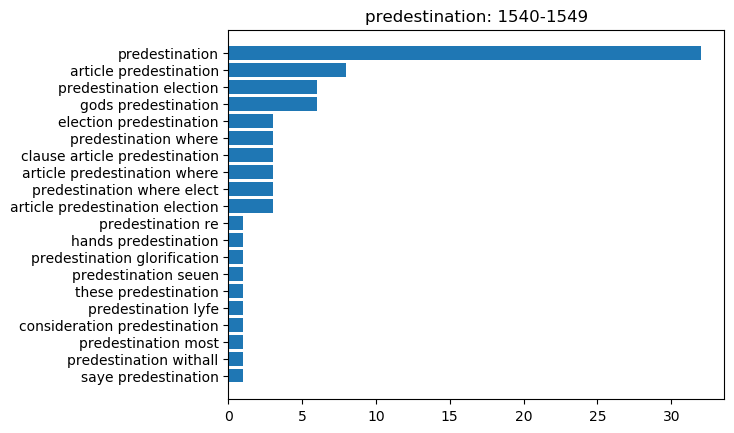

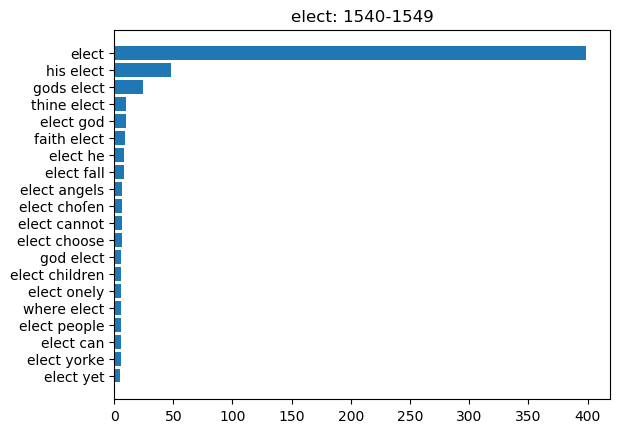

starting: eebo-1550-1559
loading gzipped texts...
vectorizing...
extracting top terms...


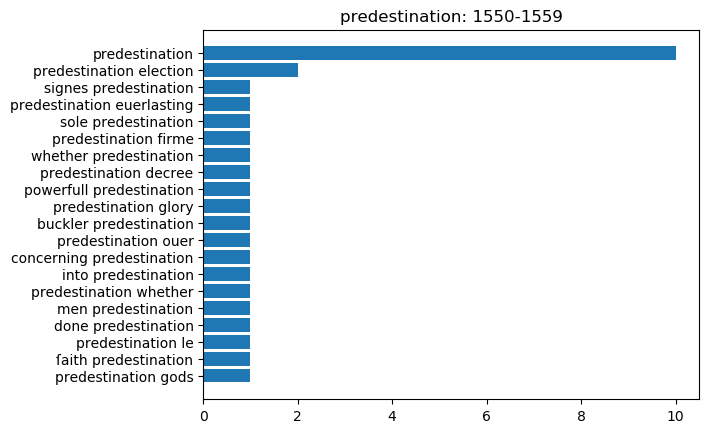

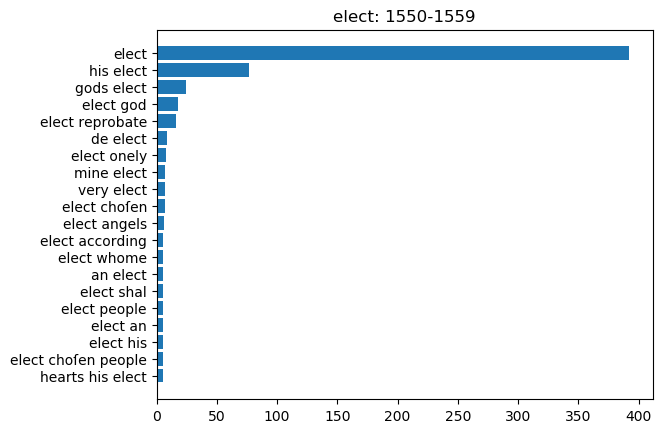

starting: eebo-1560-1569
loading gzipped texts...
vectorizing...
extracting top terms...


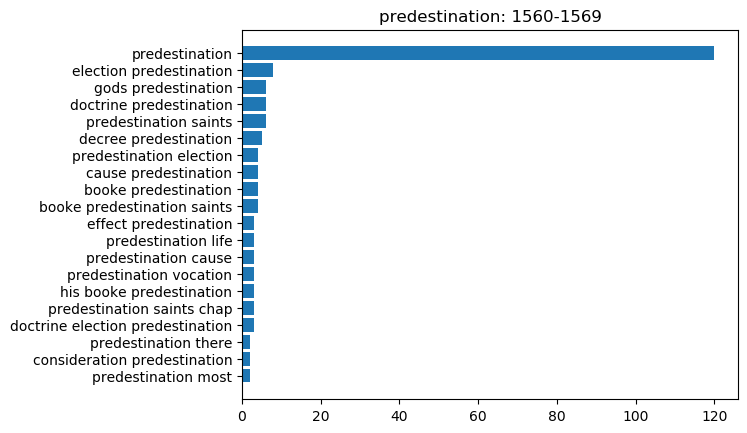

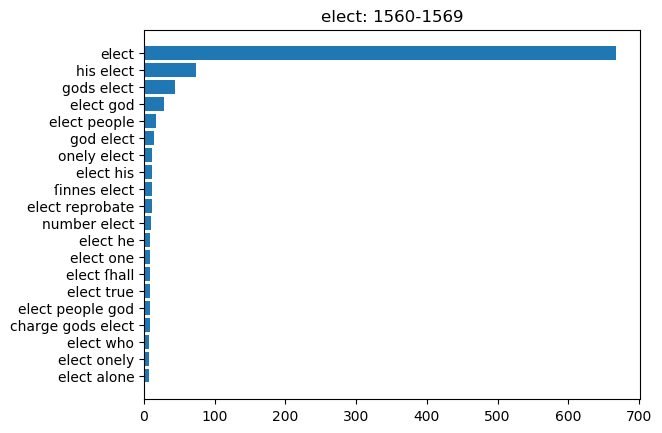

starting: eebo-1570-1579
loading gzipped texts...
vectorizing...
extracting top terms...


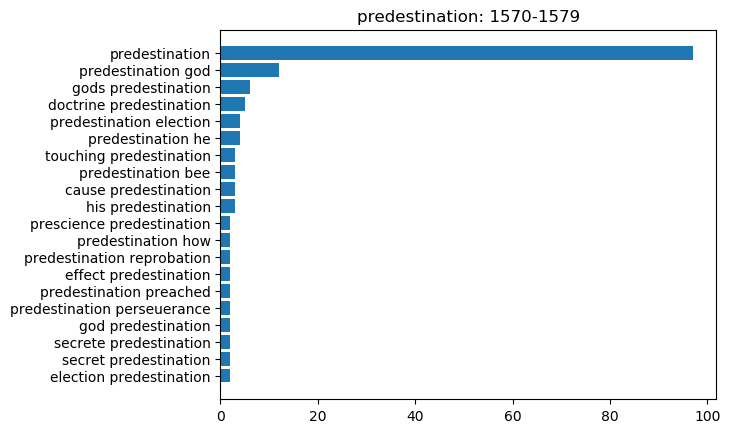

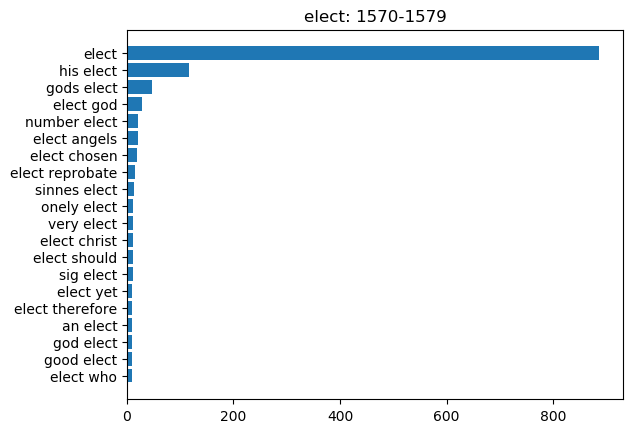

starting: eebo-1580-1589
loading gzipped texts...
vectorizing...
extracting top terms...


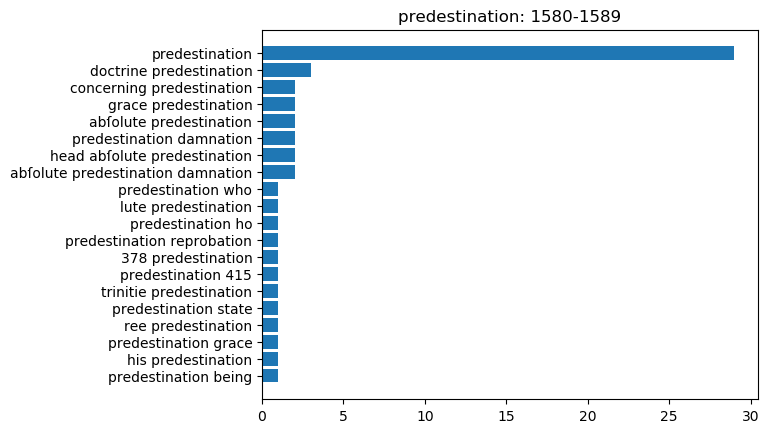

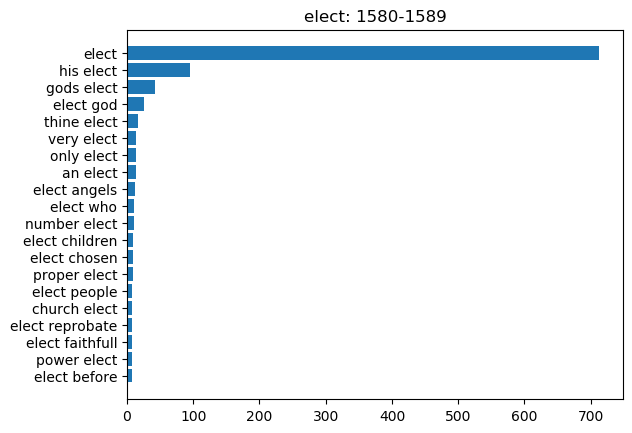

starting: eebo-1590-1599
loading gzipped texts...
vectorizing...
extracting top terms...


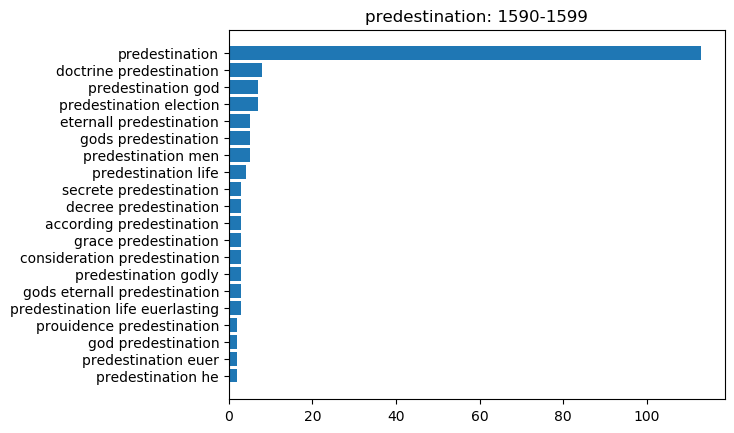

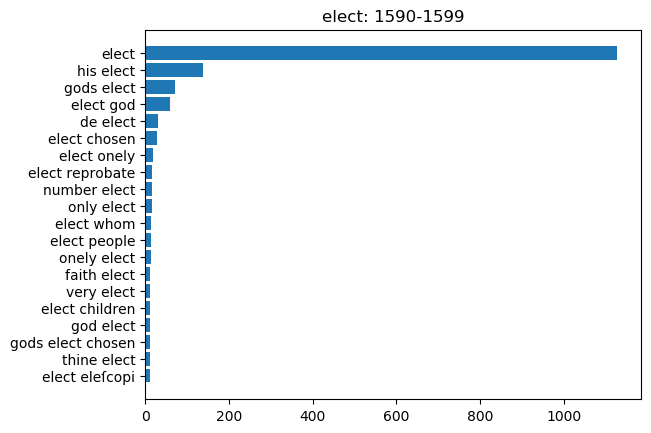

starting: eebo-1600-1609
loading gzipped texts...
vectorizing...
extracting top terms...


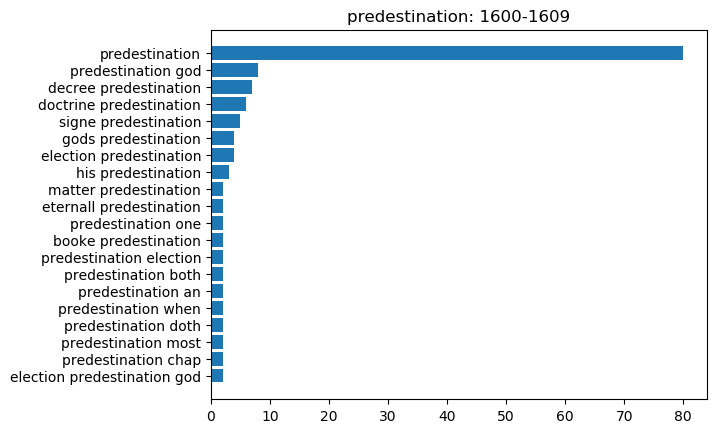

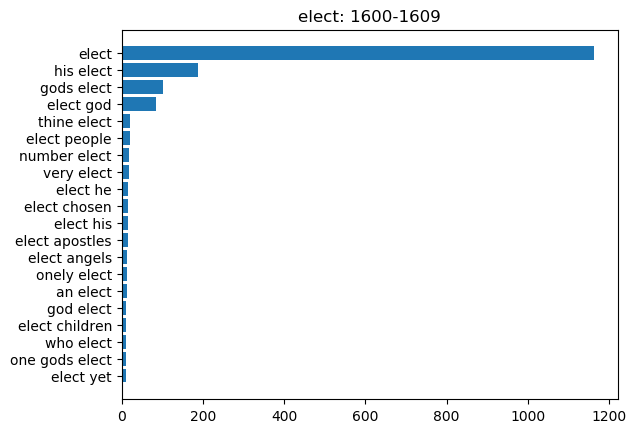

starting: eebo-1610-1619
loading gzipped texts...
vectorizing...
extracting top terms...


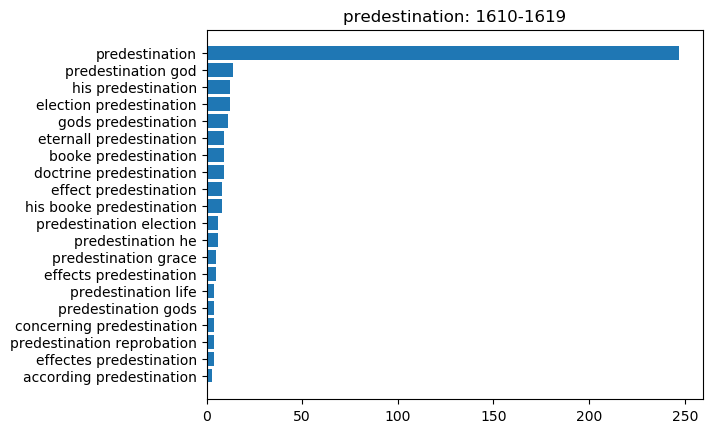

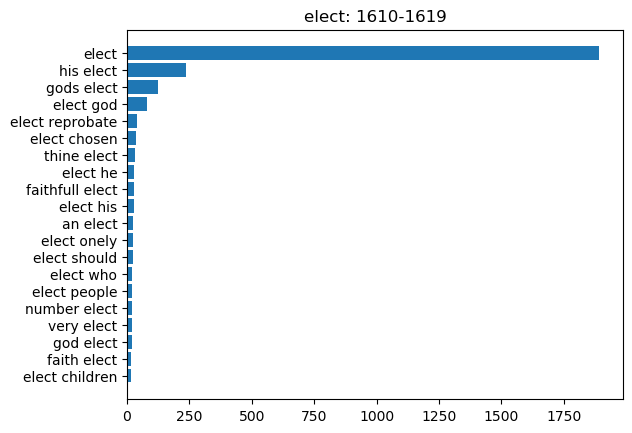

starting: eebo-1620-1629
loading gzipped texts...
vectorizing...
extracting top terms...


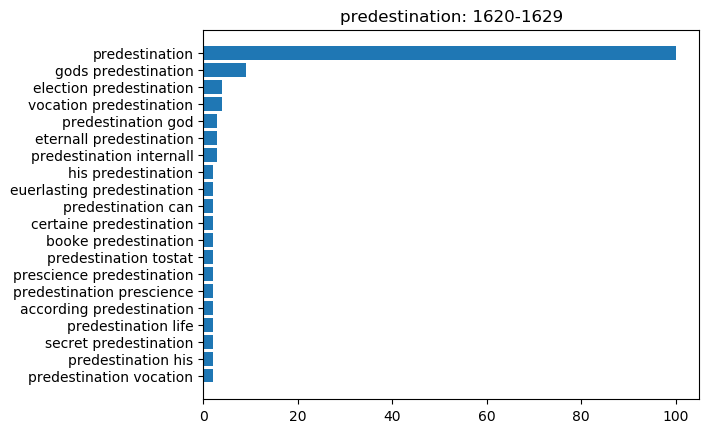

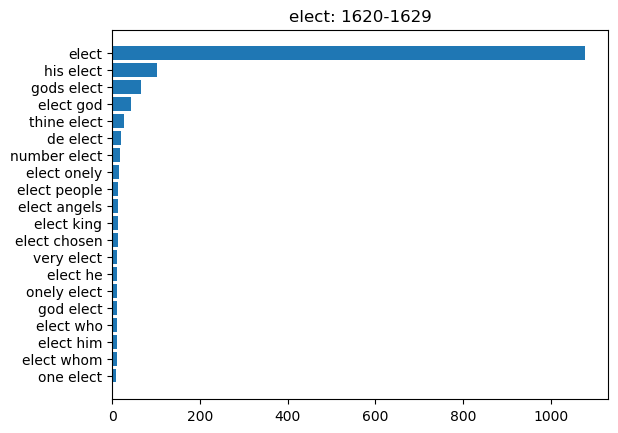

starting: eebo-1630-1639
loading gzipped texts...
vectorizing...
extracting top terms...


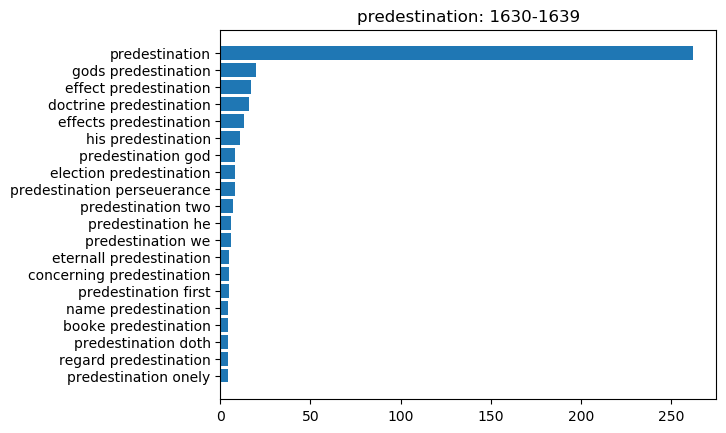

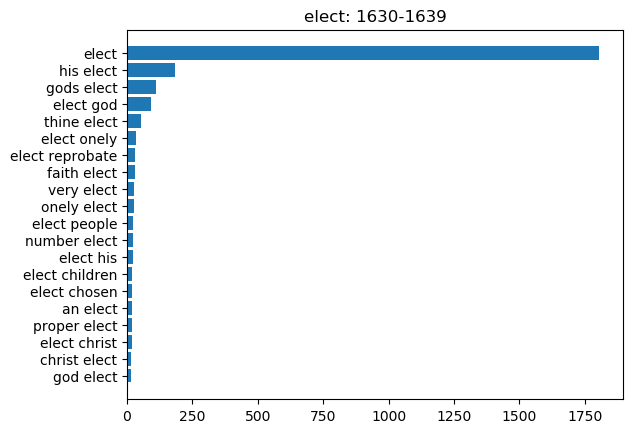

In [7]:
# load data

import gzip
import gc 

eebo_models = dict()
ktd=dict()

input_data = ["../texts/eebo/eebo-1520-1529.txt.gz",
            "../texts/eebo/eebo-1530-1539.txt.gz",
            "../texts/eebo/eebo-1540-1549.txt.gz",
            "../texts/eebo/eebo-1550-1559.txt.gz",
            "../texts/eebo/eebo-1560-1569.txt.gz",
            "../texts/eebo/eebo-1570-1579.txt.gz",
            "../texts/eebo/eebo-1580-1589.txt.gz",
            "../texts/eebo/eebo-1590-1599.txt.gz",
            "../texts/eebo/eebo-1600-1609.txt.gz",
            "../texts/eebo/eebo-1610-1619.txt.gz",
            "../texts/eebo/eebo-1620-1629.txt.gz",
            "../texts/eebo/eebo-1630-1639.txt.gz"]

for fp in input_data:
    
    # re-establisher vectorizer
    vectorizer = CountVectorizer(
        input='content',
        lowercase=True,
        ngram_range=(1,3),
        strip_accents=None,
        stop_words=stopWords)
    
    model_name = os.path.basename(fp).split(".")[0]
    print("starting: {0}".format(model_name))

    print("loading gzipped texts...")
    raw_text = gzip.open(fp,'rt').read()
    
    # vectorize model
    print("vectorizing...")
    dtm = vectorizer.fit_transform([raw_text])

    print("extracting top terms...")
    ktd = extract_top_ngrams(["predestination","elect"],dtm)
    plot_top_ngrams(ktd,model_name)
    
    # free memory
    del vectorizer, dtm
    gc.collect()
    
